In [1]:
import pandas as pd
import numpy as np

#arquivo csv é necessário fazer alguns tratamentos: 
#primeiro separador de colunas é ','; 
#descobrir o encoding; 
#trocar a ',' na coluna altura por '.'
#tirar o espaço da coluna "AlTURA"
mundial_10 = pd.read_csv(r'Mundial 2010.csv',sep= ',',encoding='latin1',skipinitialspace = True, thousands = '.', decimal = ',', dtype ={'ALTURA':np.float64})
display(mundial_10)

,Nº,NOME,IDADE,ALTURA,POSIÇÃO
0,1,Fabiana,25,1.93,Meio de rede
1,2,Carol Gattaz,29,1.92,Meio de rede
2,3,Dani Lins,25,1.81,Levantadora
3,5,Adenizia,23,1.85,Meio de rede
4,6,Thaisa,23,1.96,Meio de rede
5,8,Jaque,26,1.86,Ponteira
6,10,Sassá,28,1.79,Ponteira
7,11,Joyce,26,1.90,Oposto
8,12,Natália,21,1.86,Ponteira
9,13,Sheilla,27,1.85,Oposto


Text(0.5, 1.0, 'Mundial 2010 - Altura')

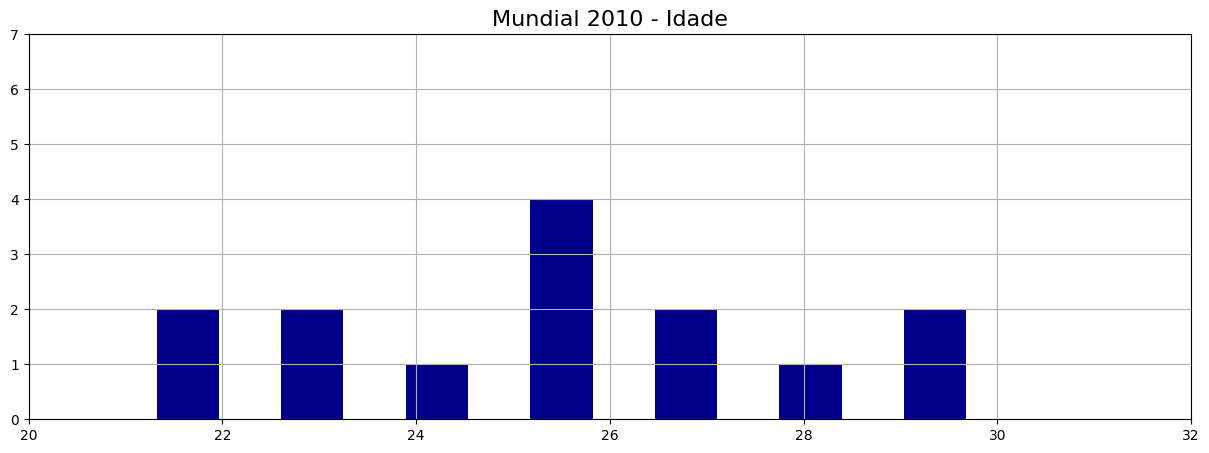

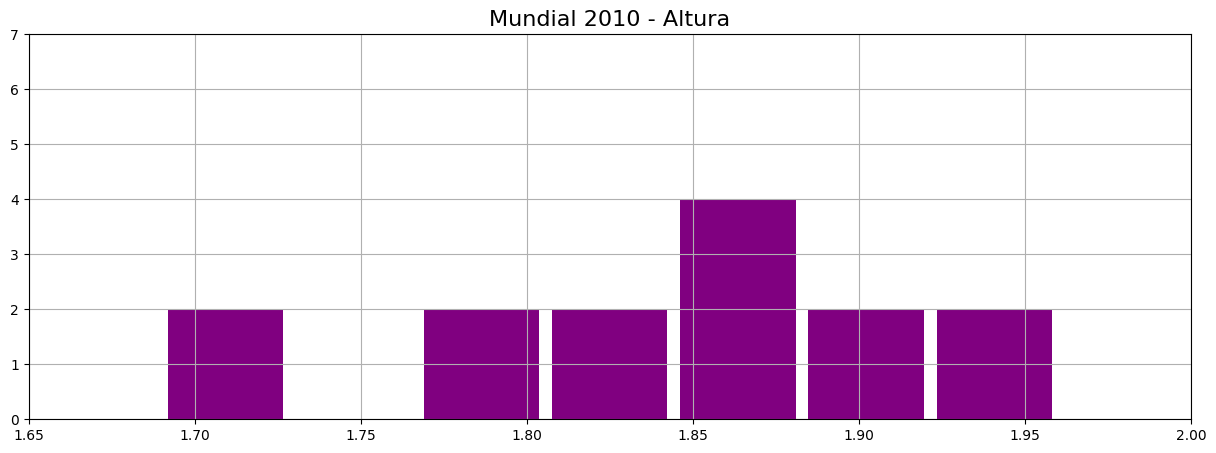

In [2]:
#contagem de idade e altura
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
mundial_10['IDADE'].hist(bins=7, rwidth=0.50, color="darkblue")
plt.xlim(20,32) 
plt.ylim(0,7)
plt.title("Mundial 2010 - Idade", fontsize = 16)

plt.figure(figsize=(15,5))
mundial_10['ALTURA'].hist(bins=7, rwidth=0.90, color="purple")
plt.xlim(1.65,2.00) 
plt.ylim(0,7)
plt.title("Mundial 2010 - Altura", fontsize = 16)

In [3]:
##qtde por posição
mundial_10['POSIÇÃO'].value_counts()

Meio de rede    4
Ponteira        4
Levantadora     2
Oposto          2
Líbero          2
Name: POSIÇÃO, dtype: int64

In [4]:
#média de altura
round(mundial_10.ALTURA.mean(), 2)

1.84

In [5]:
#média de idade
round(mundial_10.IDADE.mean(), 2)

25.43

In [6]:
#ordenar por jogadora mais velha
mundial_10.groupby('NOME')['IDADE'].max().sort_values(ascending=False)

NOME
Fabí            30
Carol Gattaz    29
Sassá           28
Fabíola         27
Sheilla         27
Jaque           26
Joyce           26
Dani Lins       25
Fabiana         25
Fê Garay        24
Adenizia        23
Thaisa          23
C. Brait        22
Natália         21
Name: IDADE, dtype: int64

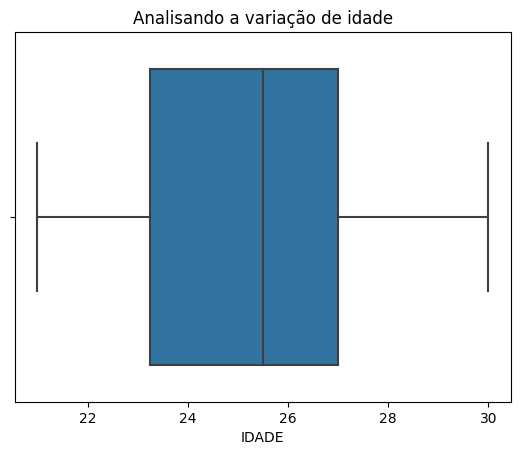

In [14]:
import seaborn as sns

# Analise grafica
plt.title('Analisando a variação de idade')
sns.boxplot(data=mundial_10, x='IDADE');

In [7]:
#ordenar por jogadora mais alta
mundial_10.groupby('NOME')['ALTURA'].max().sort_values(ascending=False)

NOME
Thaisa          1.96
Fabiana         1.93
Carol Gattaz    1.92
Joyce           1.90
Jaque           1.86
Natália         1.86
Adenizia        1.85
Sheilla         1.85
Fabíola         1.84
Dani Lins       1.81
Fê Garay        1.79
Sassá           1.79
C. Brait        1.70
Fabí            1.69
Name: ALTURA, dtype: float64

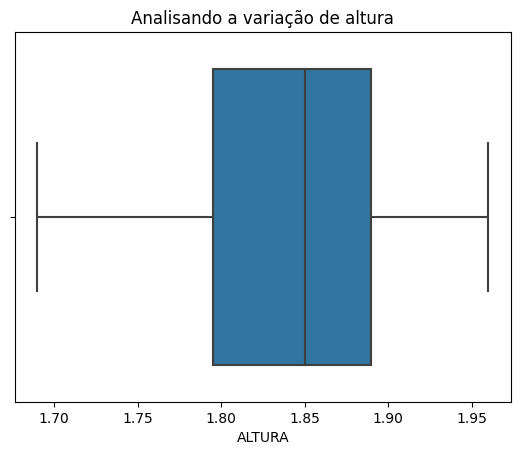

In [15]:
# Analise grafica
plt.title('Analisando a variação de altura')
sns.boxplot(data=mundial_10, x='ALTURA');

In [8]:
#média de altura por posição
mundial_10.groupby('POSIÇÃO')['ALTURA'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Meio de rede    1.92
Oposto          1.88
Levantadora     1.83
Ponteira        1.83
Líbero          1.69
Name: ALTURA, dtype: float64

In [9]:
#média de idade por posição
mundial_10.groupby('POSIÇÃO')['IDADE'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Oposto          26.50
Levantadora     26.00
Líbero          26.00
Meio de rede    25.00
Ponteira        24.75
Name: IDADE, dtype: float64

(20.0, 28.0)

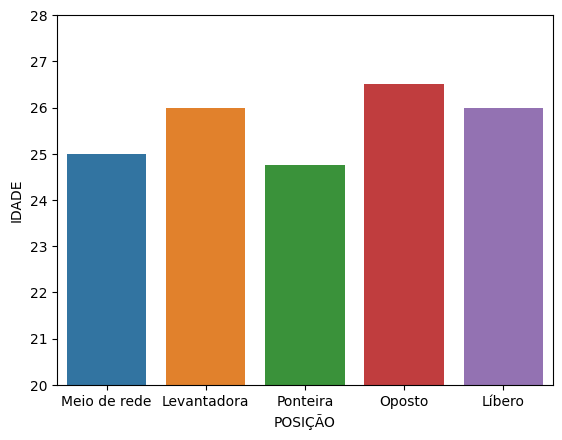

In [16]:
#média de idade por posição
mundial_10.groupby('POSIÇÃO')['IDADE'].mean()
media_idade = sns.barplot(x='POSIÇÃO', y='IDADE', data=mundial_10, ci=None)
media_idade.set_ylim(20,28)

(1.6, 1.95)

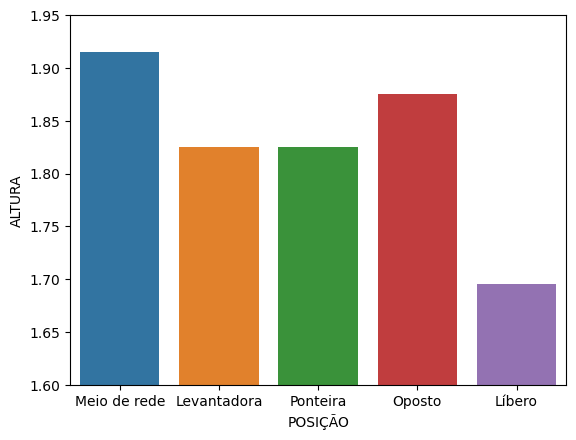

In [11]:
#média de altura por posição
mundial_10.groupby('POSIÇÃO')['ALTURA'].mean()
media_altura = sns.barplot(x='POSIÇÃO', y='ALTURA', data=mundial_10, ci=None)
media_altura.set_ylim(1.60, 1.95)

In [12]:
#criando coluna para mostrar novatas e experientes(novatas <= 25)
import sys

mundial_10['FAIXA ETÁRIA']=pd.cut(
    mundial_10['IDADE'],
    bins=[0, 25, sys.maxsize],
    labels=['Novata', 'Experiente']

)

mundial_10

,Nº,NOME,IDADE,ALTURA,POSIÇÃO,FAIXA ETÁRIA
0,1,Fabiana,25,1.93,Meio de rede,Novata
1,2,Carol Gattaz,29,1.92,Meio de rede,Experiente
2,3,Dani Lins,25,1.81,Levantadora,Novata
3,5,Adenizia,23,1.85,Meio de rede,Novata
4,6,Thaisa,23,1.96,Meio de rede,Novata
5,8,Jaque,26,1.86,Ponteira,Experiente
6,10,Sassá,28,1.79,Ponteira,Experiente
7,11,Joyce,26,1.90,Oposto,Experiente
8,12,Natália,21,1.86,Ponteira,Novata
9,13,Sheilla,27,1.85,Oposto,Experiente


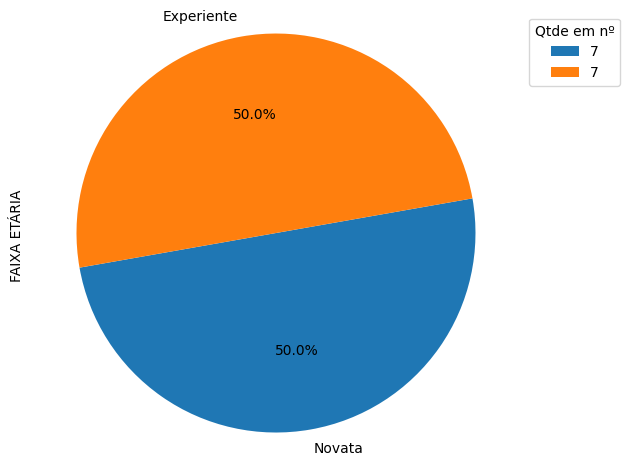

In [13]:
mundial_10['FAIXA ETÁRIA'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=190)
plt.legend(mundial_10['FAIXA ETÁRIA'].value_counts(), title="Qtde em nº",  bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()